In [5]:
import cv2
import os
import matplotlib.pyplot as plt

In [10]:
def plot_image_and_histogram(image, image_name, category=None):
    # Convert the image from BGR to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Split the image into R, G, B channels
    r, g, b = cv2.split(image_rgb)
    
    # Calculate the histogram for each channel
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    
    # Create a figure with two subplots
    plt.figure(figsize=(12, 6))

    # Display the image
    plt.subplot(1, 2, 1)
    plt.title(f'Image: {image_name}')
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axis

    # Display the histogram
    plt.subplot(1, 2, 2)
    plt.title(f'RGB Histogram for {image_name}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    plt.plot(hist_r, color='red', label='Red')
    plt.plot(hist_g, color='green', label='Green')
    plt.plot(hist_b, color='blue', label='Blue')
    
    plt.legend()
    plt.xlim([0, 256])
    plt.grid(True)
    
    plt.show()

In [11]:
def process_images_in_folder(folder_path, category):
    # Iterate through all files in the folder
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        
        # Load the image
        image = cv2.imread(image_path)
        
        # Check if the image was successfully loaded
        if image is not None:
            # Plot the image and its RGB histogram
            plot_image_and_histogram(image, image_name, category)
        else:
            print(f"Failed to load image {image_name} in {category}")

In [12]:
def process_dataset(dataset_path):
    # Define the subfolders (categories)
    categories = ['animal', 'landscape', 'food']
    
    # Process each category folder
    for category in categories:
        folder_path = os.path.join(dataset_path, category)
        if os.path.exists(folder_path):
            process_images_in_folder(folder_path, category)
        else:
            print(f"Folder {category} does not exist in the dataset.")

In [13]:
def process_single_image(image_path):
    image_name = os.path.basename(image_path)
    image = cv2.imread(image_path)
    if image is not None:
        plot_image_and_histogram(image, image_name)
    else:
        print(f"Failed to load image {image_name}.")

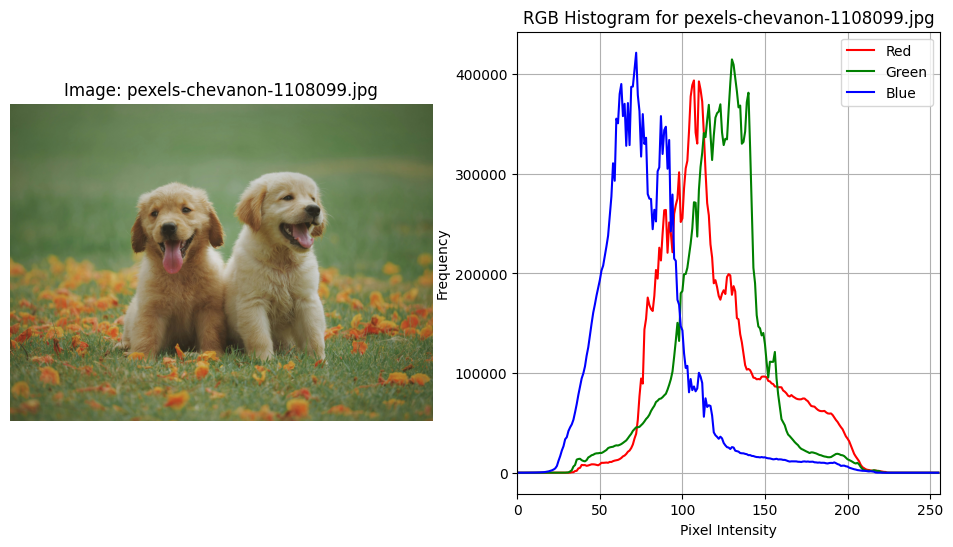

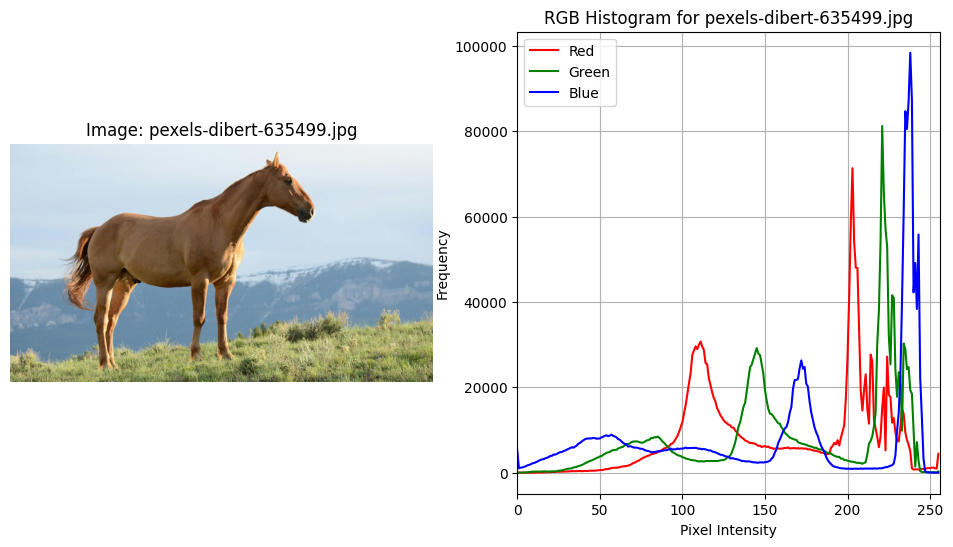

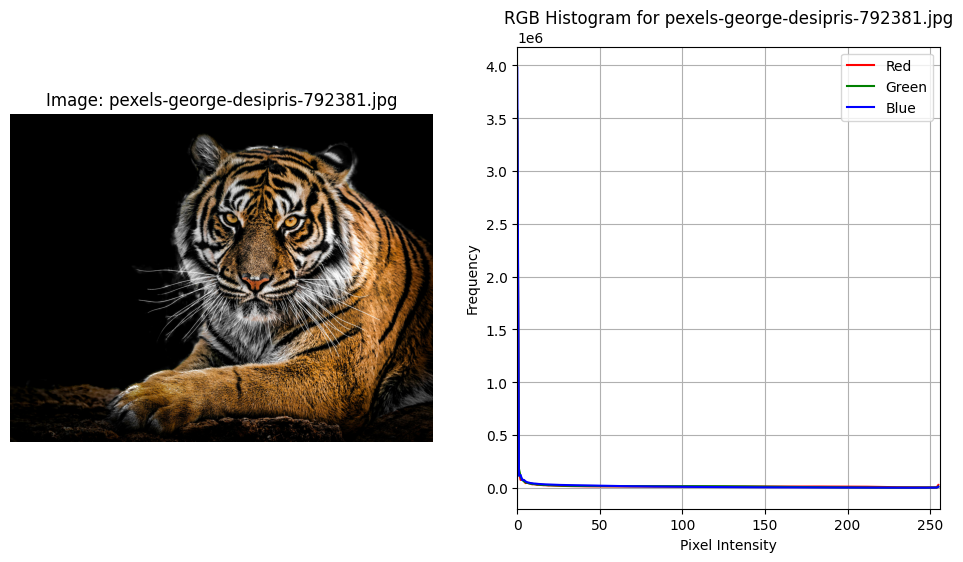

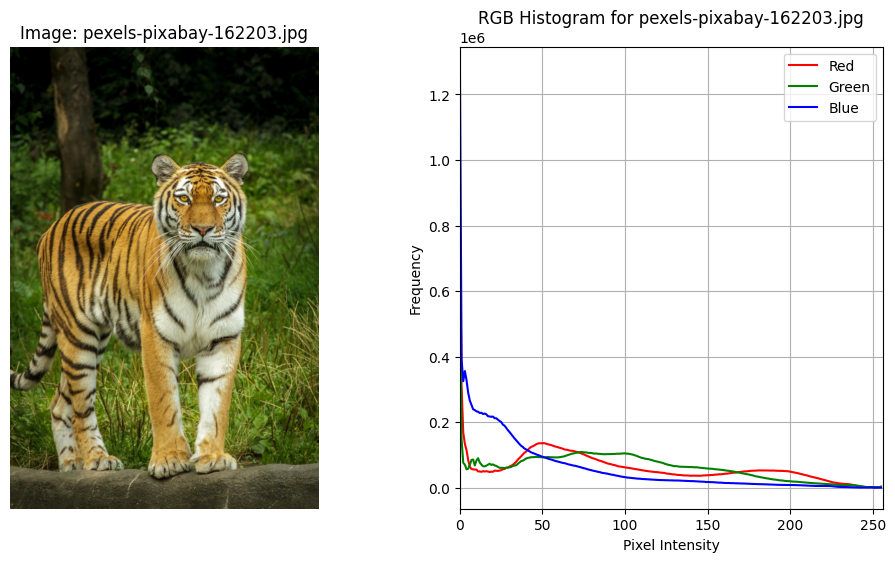

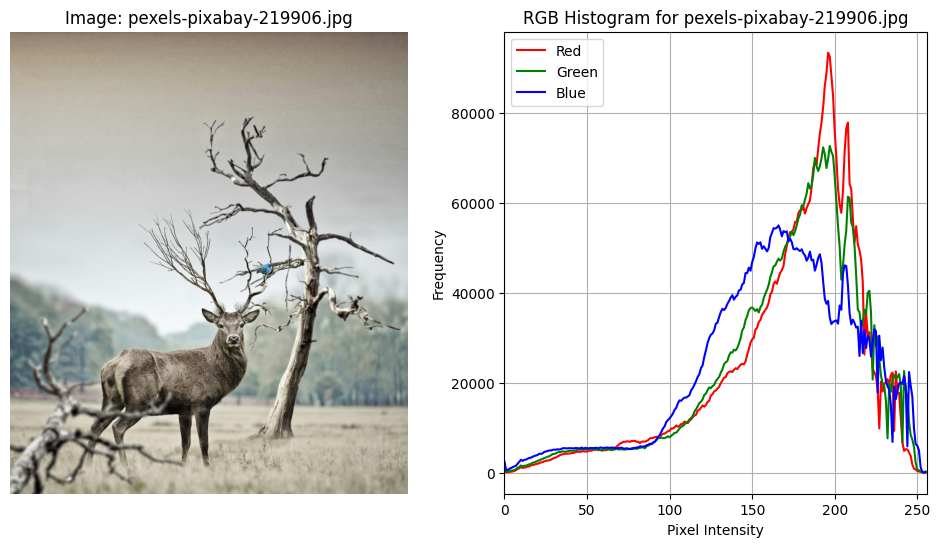

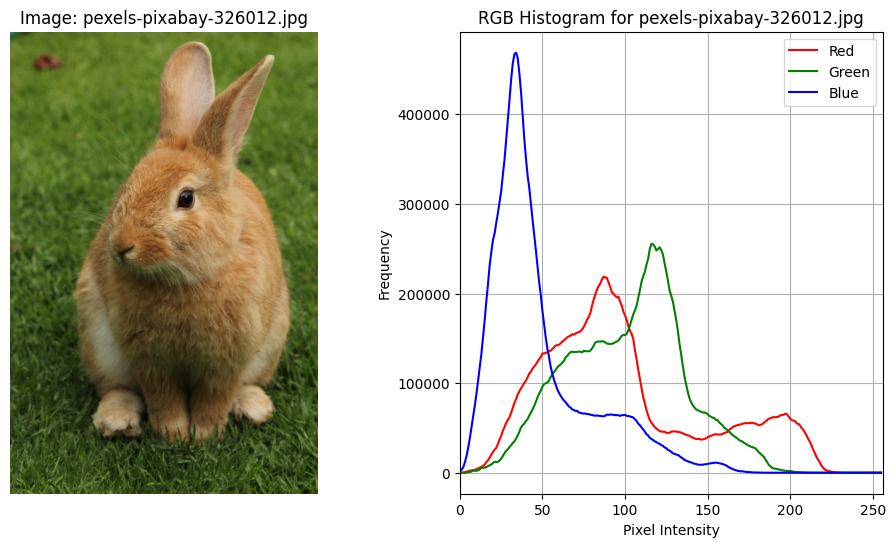

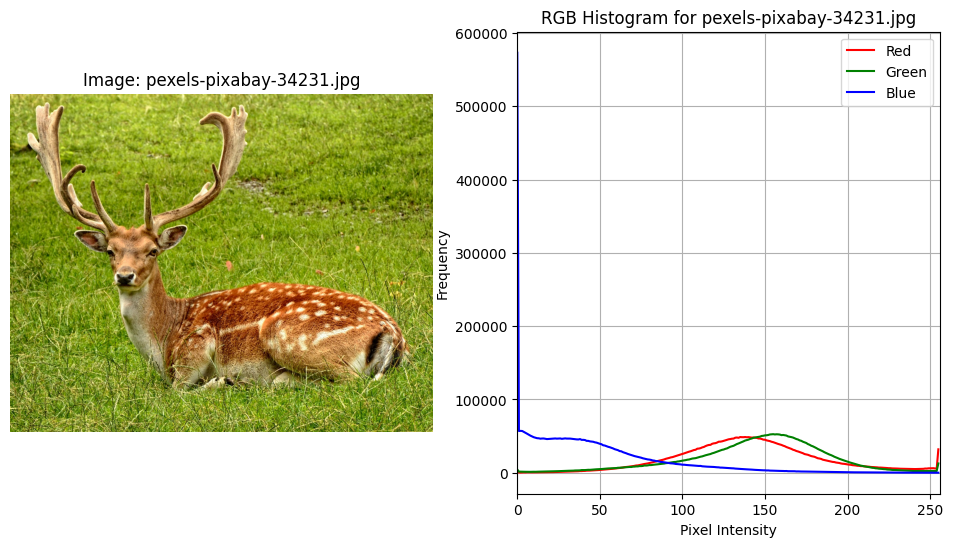

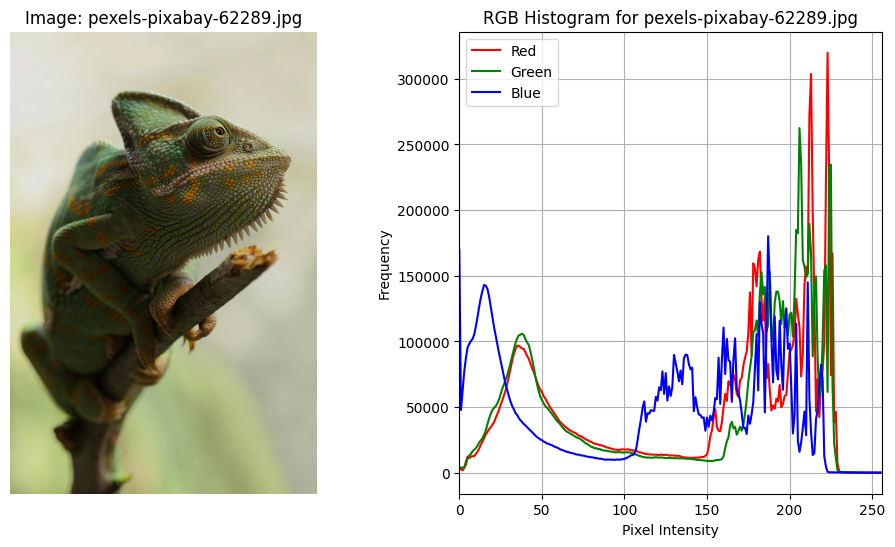

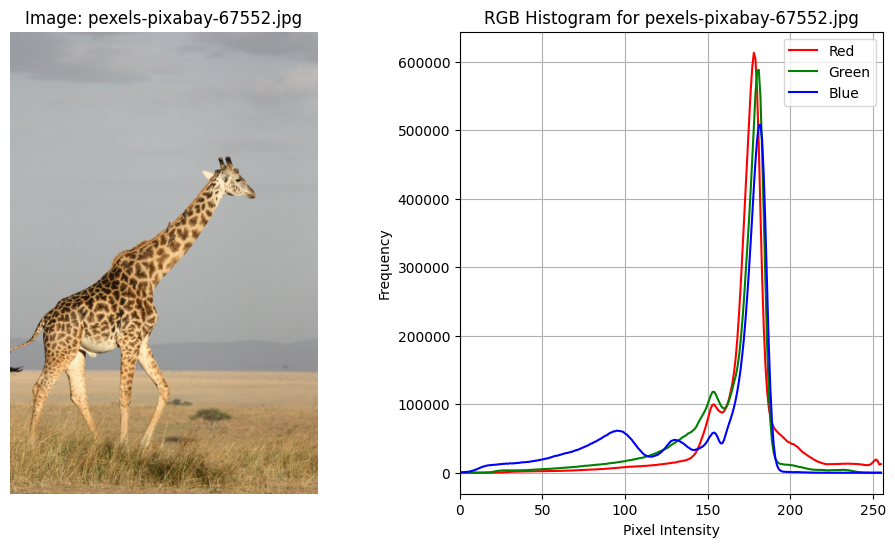

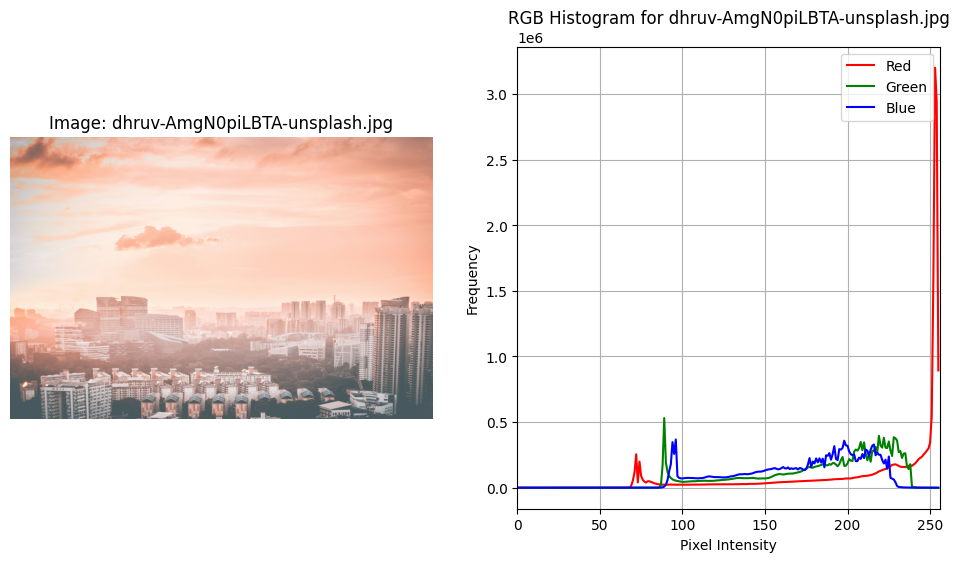

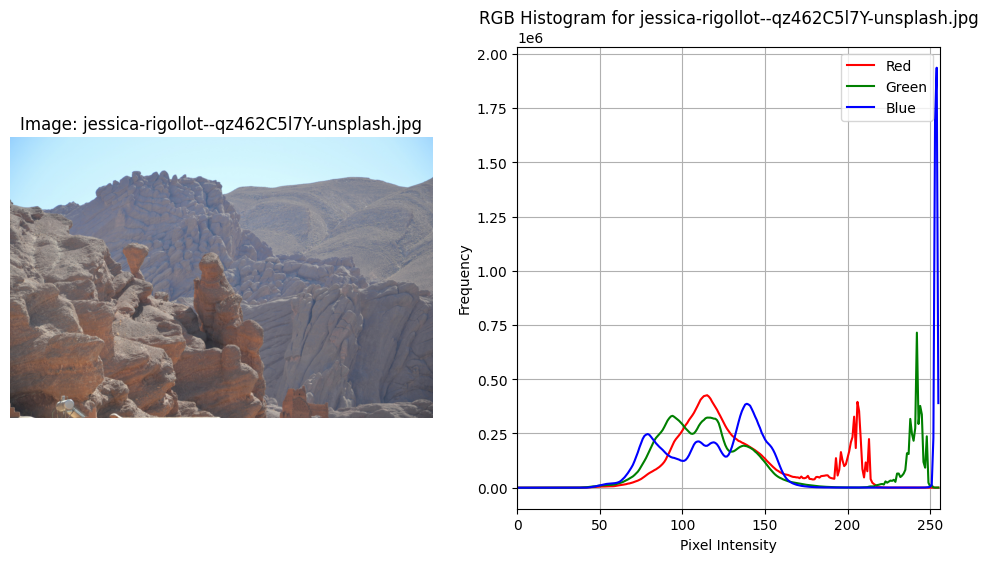

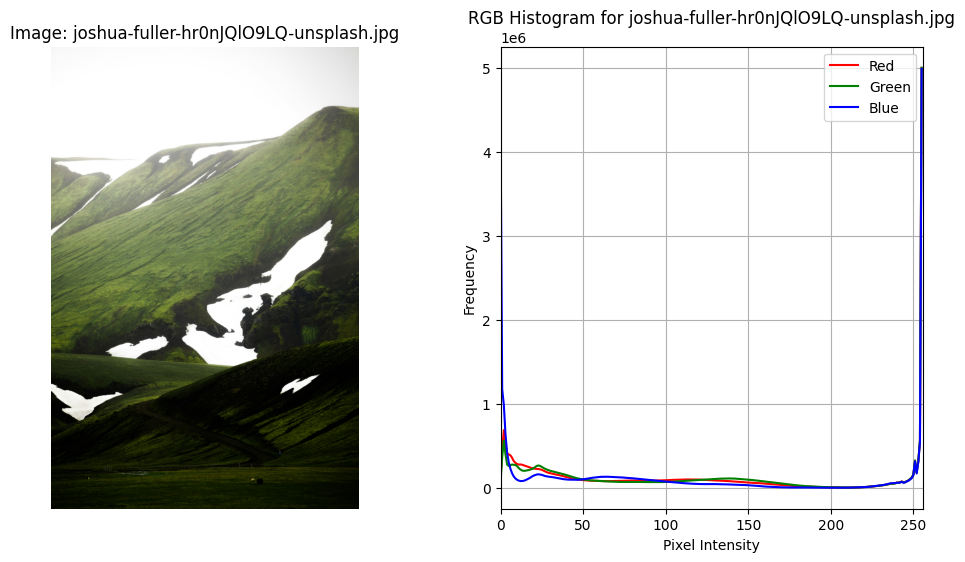

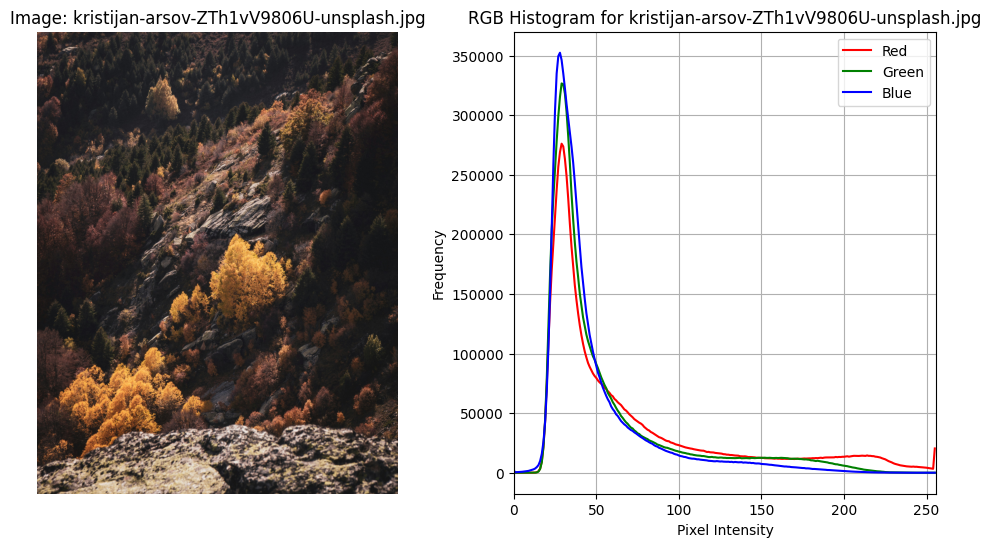

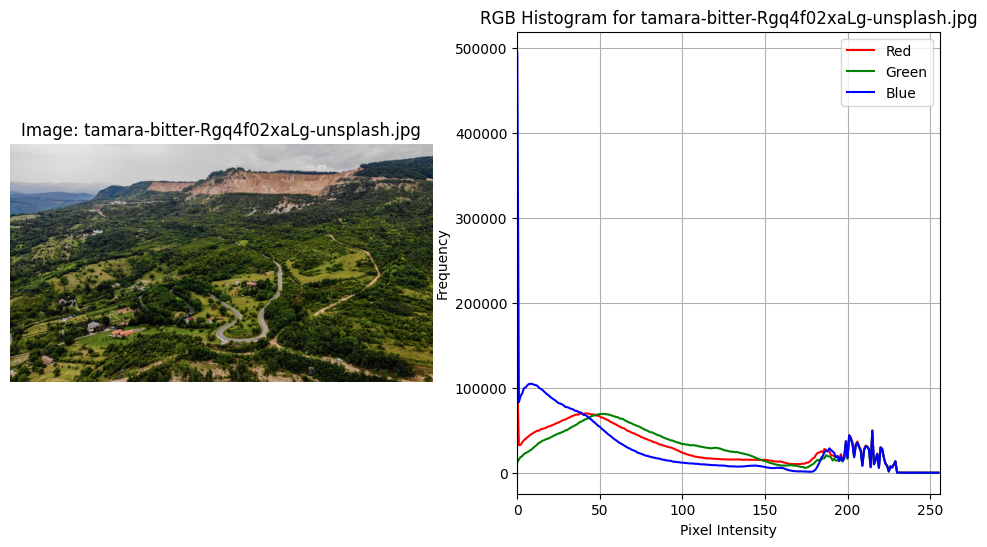

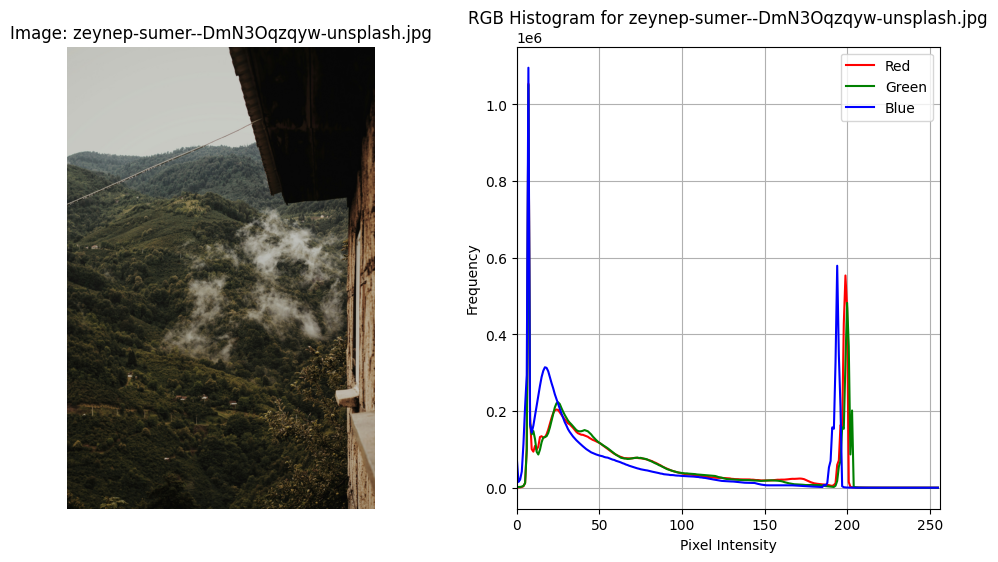

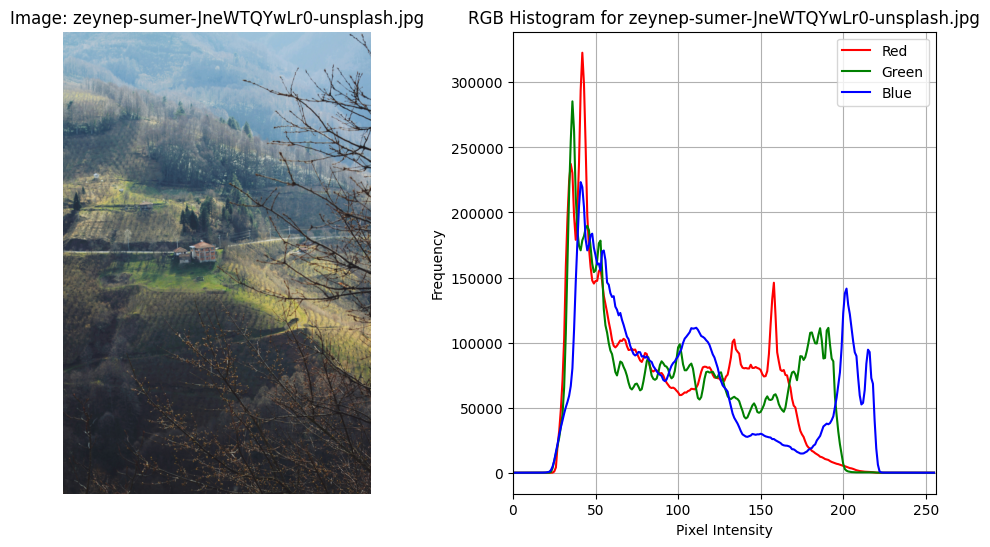

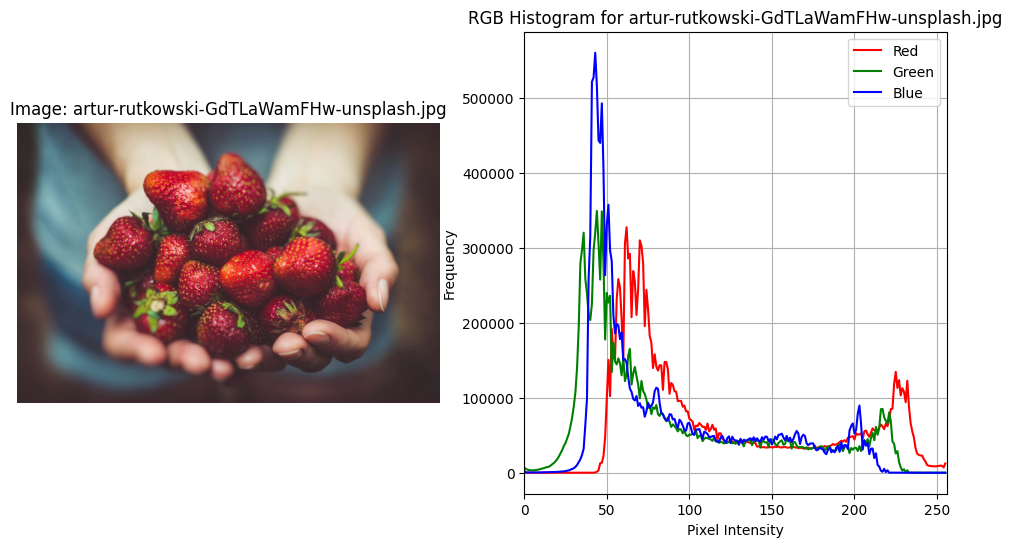

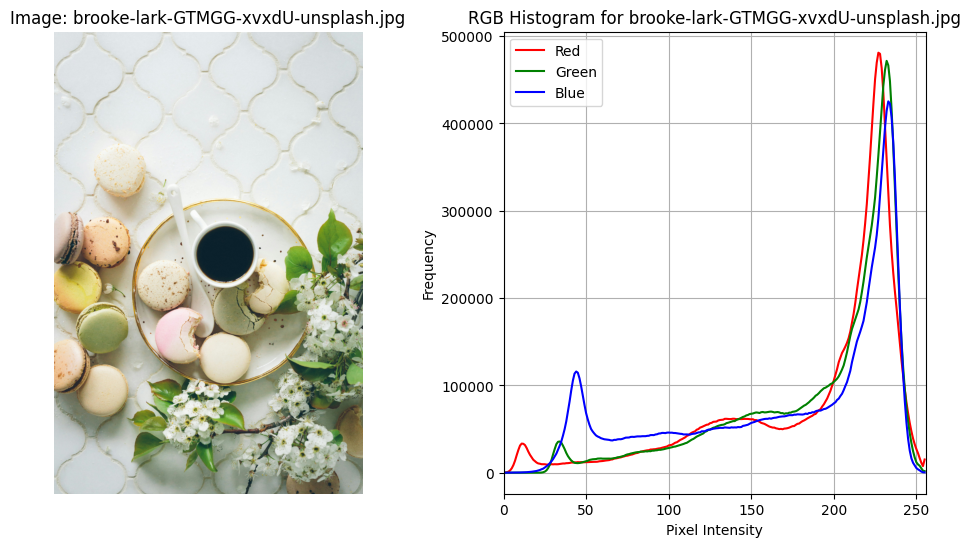

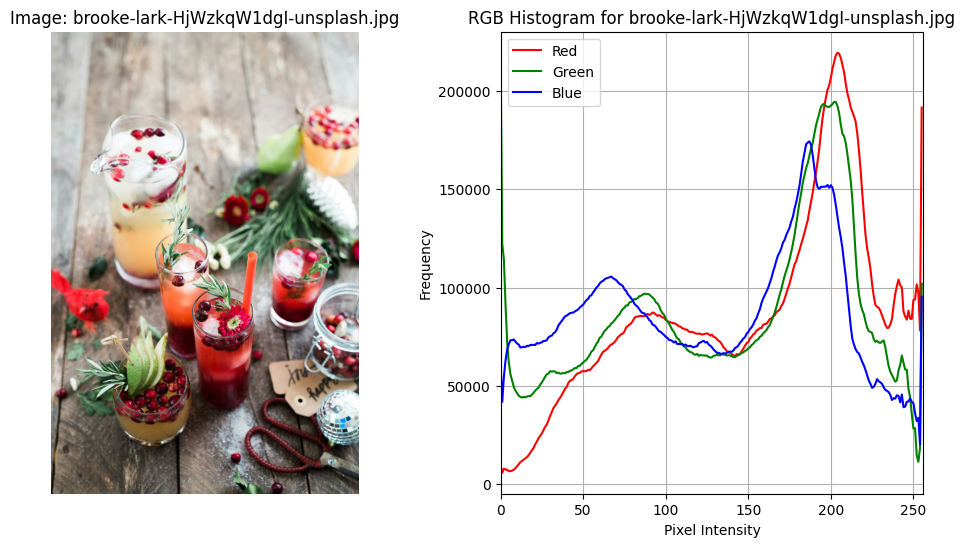

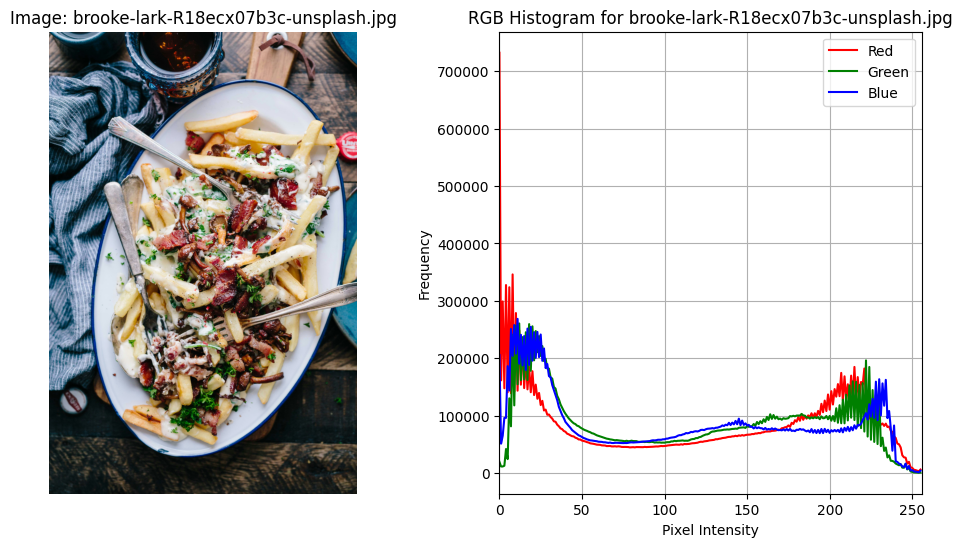

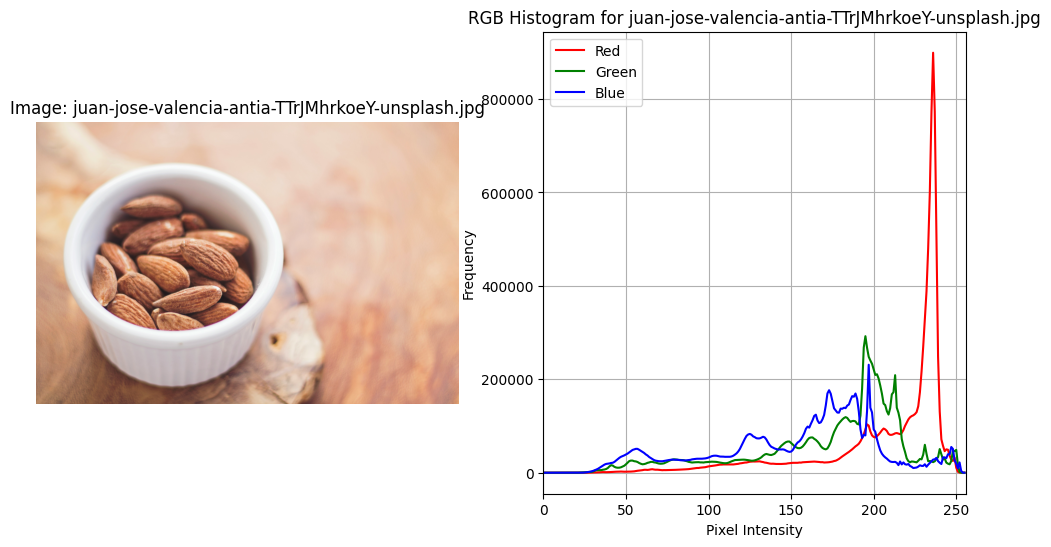

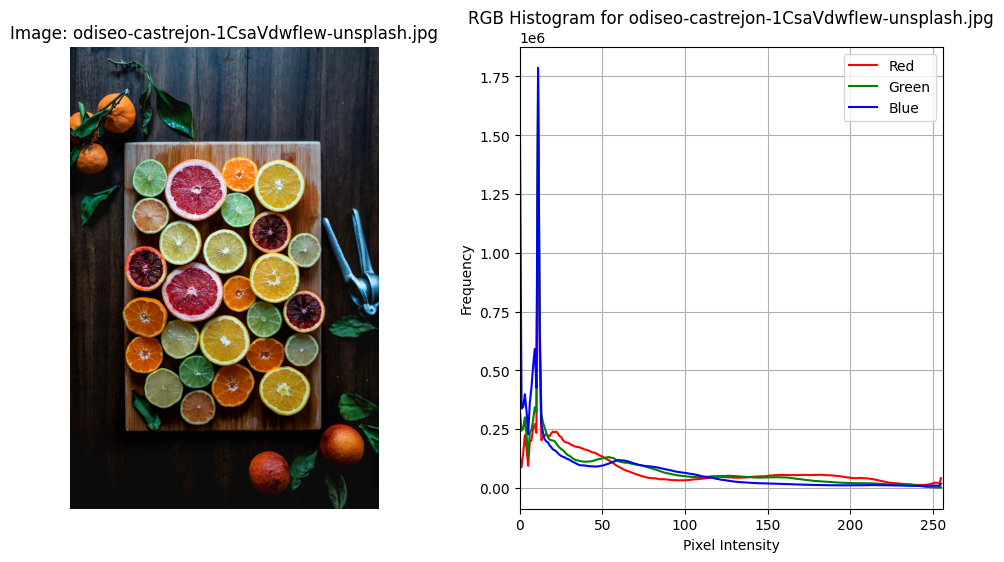

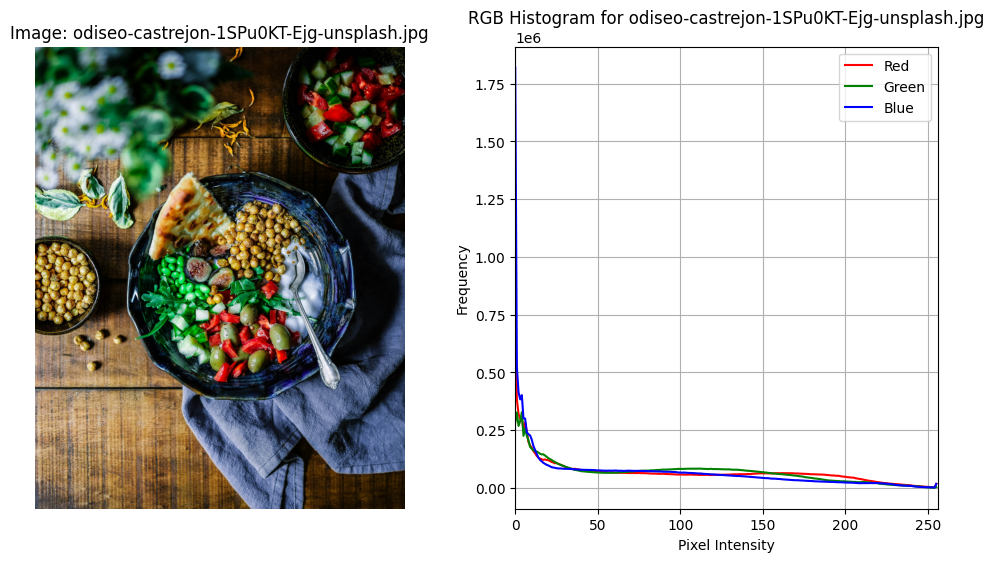

In [14]:
# Process all images in the dataset
dataset_path = r'D:\dataset'  # Path to the dataset folder
process_dataset(dataset_path)